In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [3]:
df=pd.read_csv('manhattan.csv')
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [4]:
# summarize the data
df.describe()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000
mean,5332.589997,5138.940379,1.351936,1.366770,939.727324,4.970896,11.908307,51.994914,0.403504,0.154846,0.160215,0.281153,0.294716,0.185646,0.055100,0.174908
std,3311.552136,3162.824760,0.967595,0.599588,477.949074,5.513589,10.960893,39.380433,0.490669,0.361809,0.366857,0.449625,0.455979,0.388875,0.228208,0.379942
min,1.000000,1300.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2443.500000,3150.000000,1.000000,1.000000,613.000000,2.000000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5128.000000,4000.000000,1.000000,1.000000,800.000000,4.000000,8.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8149.500000,6000.000000,2.000000,2.000000,1141.000000,6.000000,17.000000,90.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,11349.000000,20000.000000,5.000000,5.000000,4800.000000,43.000000,83.000000,180.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [6]:
# Check missing values
df.isnull().sum()

rental_id           0
rent                0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64

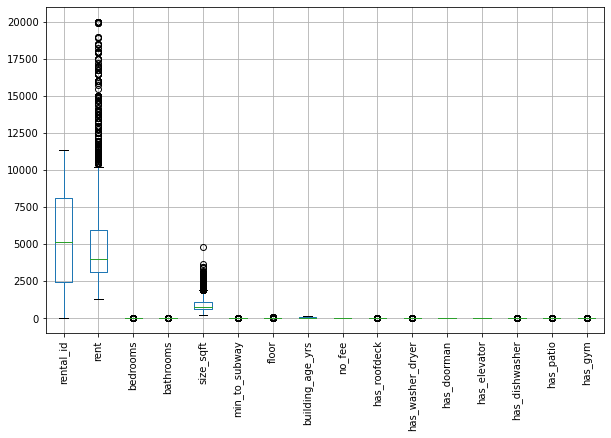

In [7]:
# Visualizing boxplot
plt.figure(figsize = (10,6))
df.boxplot()
plt.xticks(rotation=90);

In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
X = df.loc[:, 'bedrooms':'has_gym']
y = df['rent']

#### Split dataset into training set and test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# find the coefficient and the intercept
model = LinearRegression().fit(X_train, y_train)

# predict y-values from x_test
predict = model.predict(X_test)

mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)

In [11]:
print('회귀 계수(가중치): {}'.format(model.coef_))
print('회귀 절편(편향): {}'.format(model.intercept_))

pd.Series(model.coef_, index = X.columns)

회귀 계수(가중치): [-304.59016704 1190.08027257    4.80394913  -13.82413267   24.92846571
   -7.15456921 -160.19419477  -81.52377373  221.00065083 -204.89624591
  178.89942529  -30.13627994  -45.82665647  -96.01541842]
회귀 절편(편향): -392.0303633838712


bedrooms            -304.590167
bathrooms           1190.080273
size_sqft              4.803949
min_to_subway        -13.824133
floor                 24.928466
building_age_yrs      -7.154569
no_fee              -160.194195
has_roofdeck         -81.523774
has_washer_dryer     221.000651
has_doorman         -204.896246
has_elevator         178.899425
has_dishwasher       -30.136280
has_patio            -45.826656
has_gym              -96.015418
dtype: float64

### Evaluating the model's MSE, RMSE and R2_squared

In [12]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}\n'.format(model.score(X_test, y_test)))
print('MSE: {}'.format(mse))
print('RMSE: {}'.format(np.sqrt(mse)))
print('R2 score: {}'.format(r2))

학습 데이터 점수: 0.7835978619622151
평가 데이터 점수: 0.7679870079776449

MSE: 2399800.4306646963
RMSE: 1549.1289264179068
R2 score: 0.7679870079776449


In [13]:
# Deriving the regression equation
print('y = ' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_):
    print(str(c) + ' * x' + str(i))

y = -392.0303633838712 
-304.59016703859294 * x0
1190.0802725654391 * x1
4.8039491333189455 * x2
-13.824132672420538 * x3
24.92846570925956 * x4
-7.15456920781034 * x5
-160.19419477387208 * x6
-81.52377373326297 * x7
221.00065082990915 * x8
-204.89624590657232 * x9
178.89942529307382 * x10
-30.136279936235223 * x11
-45.82665647021628 * x12
-96.01541842024552 * x13


### Visualizing Results with Matplotlib

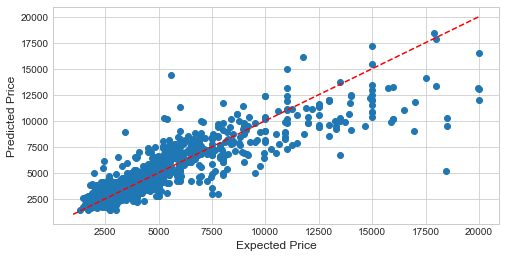

In [14]:
plt.style.use(['seaborn-whitegrid'])
plt.figure(figsize=(8,4))
plt.scatter(y_test, predict)
plt.plot([1000, 20000], [1000, 20000], '--r')
plt.xlabel('Expected Price', fontsize = 12)
plt.ylabel('Predicted Price', fontsize = 12)
plt.show()

### Cross Validatation

In [15]:
import multiprocessing

scores = cross_val_score(model, X, y, cv=5, scoring = 'neg_mean_squared_error', n_jobs = multiprocessing.cpu_count())
r2 = cross_val_score(model, X, y, cv=5, scoring = 'r2')

print('NMSE: {}'.format(scores))
print('NMSE mean: {}\n'.format(scores.mean()))
print('R2 scores: {}'.format(r2))
print('R2 scores mean: {}'.format(r2.mean()))

NMSE: [-2373138.7484426  -1956049.48031987 -2234068.36609823 -2408523.20939687
 -2270797.01529553]
NMSE mean: -2248515.363910619

R2 scores: [0.75489073 0.77348034 0.76272855 0.79301626 0.7847166 ]
R2 scores mean: 0.7737664940023594


### Ridge Regression

In [16]:
# Ridge

model = Ridge().fit(X_train, y_train)

param_grid = [ { 'alpha' : [.001, .01, .1, 1, 10, 100, 1000] }]

gs = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv = 5, n_jobs = multiprocessing.cpu_count())
result = gs.fit(X, y)

print('최적 점수: {}'.format(result.best_score_))
print('최적 파라미터: {}'.format(result.best_params_))
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)

최적 점수: 0.773820796694672
최적 파라미터: {'alpha': 10}
Ridge(alpha=10)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011969,0.001785,0.005385,0.001492,0.001,{'alpha': 0.001},0.754891,0.773480,0.762729,0.793016,0.784717,0.773767,0.013919,5
1,0.010773,0.001715,0.006182,0.001465,0.01,{'alpha': 0.01},0.754890,0.773481,0.762729,0.793016,0.784717,0.773767,0.013919,4
2,0.009177,0.000971,0.005980,0.001985,0.1,{'alpha': 0.1},0.754888,0.773483,0.762730,0.793018,0.784717,0.773767,0.013920,3
3,0.008578,0.000799,0.004987,0.000895,1,{'alpha': 1},0.754861,0.773508,0.762745,0.793032,0.784723,0.773774,0.013930,2
4,0.010375,0.002717,0.004585,0.000489,10,{'alpha': 10},0.754589,0.773735,0.762867,0.793145,0.784767,0.773821,0.014022,1
5,0.010373,0.002998,0.005985,0.001546,100,{'alpha': 100},0.751788,0.774443,0.762775,0.792784,0.784376,0.773233,0.014677,6
6,0.008779,0.002554,0.003986,0.000893,1000,{'alpha': 1000},0.739740,0.768867,0.755360,0.784879,0.778006,0.765370,0.016184,7


### Lasso Regression

In [17]:
model = Lasso().fit(X_train, y_train)

param_grid = [ { 'alpha' : [.001, .01, .1, 1, 10, 100, 1000] }]

gs = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv = 5, n_jobs = multiprocessing.cpu_count())
result = gs.fit(X, y)

print('최적 점수: {}'.format(result.best_score_))
print('최적 파라미터: {}'.format(result.best_params_))
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)

최적 점수: 0.773820796694672
최적 파라미터: {'alpha': 10}
Ridge(alpha=10)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011369,0.003711,0.005186,0.000399,0.001,{'alpha': 0.001},0.754891,0.773480,0.762729,0.793016,0.784717,0.773767,0.013919,5
1,0.019149,0.008703,0.007775,0.002923,0.01,{'alpha': 0.01},0.754890,0.773481,0.762729,0.793016,0.784717,0.773767,0.013919,4
2,0.025332,0.013566,0.014963,0.014657,0.1,{'alpha': 0.1},0.754888,0.773483,0.762730,0.793018,0.784717,0.773767,0.013920,3
3,0.020538,0.003252,0.013565,0.006575,1,{'alpha': 1},0.754861,0.773508,0.762745,0.793032,0.784723,0.773774,0.013930,2
4,0.024331,0.014952,0.011973,0.009056,10,{'alpha': 10},0.754589,0.773735,0.762867,0.793145,0.784767,0.773821,0.014022,1
5,0.015168,0.004474,0.006775,0.002701,100,{'alpha': 100},0.751788,0.774443,0.762775,0.792784,0.784376,0.773233,0.014677,6
6,0.011172,0.004008,0.005983,0.001544,1000,{'alpha': 1000},0.739740,0.768867,0.755360,0.784879,0.778006,0.765370,0.016184,7


### Standardizationing Data

In [18]:
mod_df = df.drop(columns=['rental_id', 'rent', 'neighborhood', 'borough'])
mod_df

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
4,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1
3535,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1
3536,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0
3537,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1


In [19]:
# StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(mod_df)
df_scaled = pd.DataFrame(data_scaled, columns=mod_df.columns)
df_scaled.describe()

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03
mean,-8.492155e-17,-1.737959e-17,-5.050746e-18,1.803838e-17,-9.580732e-17,3.764531e-17,2.529765e-16,1.443070e-17,-2.283816e-17,-2.743088e-16,2.610075e-17,-1.229904e-16,9.160360e-17,3.383059e-16
std,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00
min,-1.397410e+00,-2.279837e+00,-1.443302e+00,-9.016991e-01,-1.086589e+00,-1.320510e+00,-8.224699e-01,-4.280378e-01,-4.367844e-01,-6.253930e-01,-6.464276e-01,-4.774586e-01,-2.414817e-01,-4.604197e-01
25%,-3.637736e-01,-6.117901e-01,-6.836994e-01,-5.389077e-01,-7.216041e-01,-9.395565e-01,-8.224699e-01,-4.280378e-01,-4.367844e-01,-6.253930e-01,-6.464276e-01,-4.774586e-01,-2.414817e-01,-4.604197e-01
50%,-3.637736e-01,-6.117901e-01,-2.923890e-01,-1.761163e-01,-3.566187e-01,-3.300307e-01,-8.224699e-01,-4.280378e-01,-4.367844e-01,-6.253930e-01,-6.464276e-01,-4.774586e-01,-2.414817e-01,-4.604197e-01
75%,6.698632e-01,1.056257e+00,4.211769e-01,1.866751e-01,4.645983e-01,9.652117e-01,1.215850e+00,-4.280378e-01,-4.367844e-01,1.598995e+00,1.546964e+00,-4.774586e-01,-2.414817e-01,-4.604197e-01
max,3.770774e+00,6.060398e+00,8.077886e+00,6.898316e+00,6.486856e+00,3.250934e+00,1.215850e+00,2.336243e+00,2.289459e+00,1.598995e+00,1.546964e+00,2.094423e+00,4.141101e+00,2.171931e+00


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df.rent, test_size = .3)

model = LinearRegression().fit(X_train, y_train)

predict = model.predict(X_test)

mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}\n'.format(model.score(X_test, y_test)))
print('MSE: {}'.format(mse))
print('RMSE: {}'.format(np.sqrt(mse)))
print('R2 score: {}'.format(r2))

학습 데이터 점수: 0.7809072219203503
평가 데이터 점수: 0.7727864918670597

MSE: 2351366.803459394
RMSE: 1533.4167090061962
R2 score: 0.7727864918670597


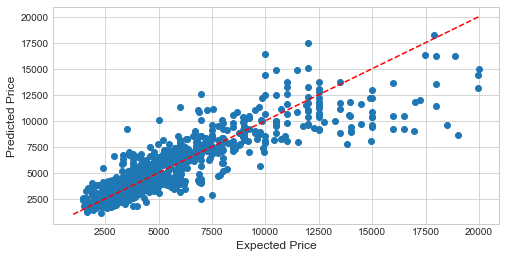

In [21]:
plt.style.use(['seaborn-whitegrid'])
plt.figure(figsize=(8,4))
plt.scatter(y_test, predict)
plt.plot([1000, 20000], [1000, 20000], '--r')
plt.xlabel('Expected Price', fontsize = 12)
plt.ylabel('Predicted Price', fontsize = 12)
plt.show()

In [22]:
# MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(mod_df)
df_scaled = pd.DataFrame(data_scaled, columns=mod_df.columns)
df_scaled.describe()

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000
mean,0.270387,0.273354,0.151588,0.115602,0.143474,0.288861,0.403504,0.154846,0.160215,0.281153,0.294716,0.185646,0.055100,0.174908
std,0.193519,0.119918,0.105044,0.128223,0.132059,0.218780,0.490669,0.361809,0.366857,0.449625,0.455979,0.388875,0.228208,0.379942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.079780,0.046512,0.048193,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.200000,0.200000,0.120879,0.093023,0.096386,0.216667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.400000,0.400000,0.195824,0.139535,0.204819,0.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df.rent, test_size = .3)

model = LinearRegression().fit(X_train, y_train)

predict = model.predict(X_test)

mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}\n'.format(model.score(X_test, y_test)))
print('MSE: {}'.format(mse))
print('RMSE: {}'.format(np.sqrt(mse)))
print('R2 score: {}'.format(r2))

학습 데이터 점수: 0.7867528334780373
평가 데이터 점수: 0.7616256872841242

MSE: 2509544.526745709
RMSE: 1584.1541991692945
R2 score: 0.7616256872841242


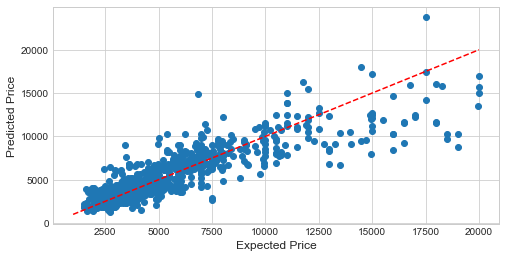

In [24]:
plt.style.use(['seaborn-whitegrid'])
plt.figure(figsize=(8,4))
plt.scatter(y_test, predict)
plt.plot([1000, 20000], [1000, 20000], '--r')
plt.xlabel('Expected Price', fontsize = 12)
plt.ylabel('Predicted Price', fontsize = 12)
plt.show()